**Dataset**
labeled datasset collected from Spotify (Assignment 1 - Spotify Reviews Rating)

**Objective**
classify Review to a category from 1 to 5. <br>

**Total Estimated Time = 90-120 Mins**

**Evaluation metric**
macro f1 score

In [1]:
    from google.colab import drive
    drive.mount('/content/drive')
    %cd '/content/drive/MyDrive/NLP/Assignment_1'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/NLP/Assignment_1


### Import used libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 500)

### Load Dataset

In [3]:
df = pd.read_csv("Assignment 1 - Spotify Reviews Rating.csv")
df.head()

,Time_submitted,Review,Rating
0,7/9/2022 15:00,"Great music service, the audio is high quality and the app is easy to use. Also very quick and friendly support.",5
1,7/9/2022 14:21,Please ignore previous negative rating. This app is super great. I give it five stars+,5
2,7/9/2022 13:27,"This pop-up ""Get the best Spotify experience on Android 12"" is too annoying. Please let's get rid of this.",4
3,7/9/2022 13:26,Really buggy and terrible to use as of recently,1
4,7/9/2022 13:20,Dear Spotify why do I get songs that I didn't put on my playlist??? And why do we have shuffle play?,1


### Data splitting

It is a good practice to split the data before EDA helps maintain the integrity of the machine learning process, prevents data leakage, simulates real-world scenarios more accurately, and ensures reliable model performance evaluation on unseen data.

In [270]:
val_test_ratio = 0.2
X_train, X_val_test, y_train, y_val_test = train_test_split(df["Review"],
                                                    df["Rating"],
                                                    test_size=val_test_ratio,
                                                    stratify=df["Rating"],
                                                    random_state=42)

In [271]:
val_ratio = 0.5
X_val, X_test, y_val, y_test = train_test_split(X_val_test,
                                                    y_val_test,
                                                    test_size=val_ratio,
                                                    stratify=y_val_test,
                                                    random_state=42)

In [6]:
print(len(df))
print(len(X_train))
print(len(X_val))
print(len(X_test))

61594
49275
6159
6160


### EDA on training data

- check NaNs

In [7]:
X_train.isna().sum()

0

- check duplicates

In [8]:
X_train.duplicated().sum()

177

In [9]:
train = pd.concat([X_train, y_train], axis=1)
val = pd.concat([X_val, y_val], axis=1)
test = pd.concat([X_test, y_test], axis=1)

train.head(20)

,Review,Rating
9780,Making it different from other's is Podcast.... Love the app,5
51477,Great app! A loads if music and fun! Thank you!,5
550,Best music app so far. I am a premium customer.,5
42155,It is so good because any sing you say they have it lyrics abd everything and plus you can hear clewrlt and dowa kot pause or load out of nowhere I love it!!!,5
17895,I love spotify. It says it's downloaded.. Why can't I see it?? Now it says I have multiple devices. I still can't see spotify?,2
47851,It's a very good app but ads are very irritating,5
41003,Terrible app. I use primarily for podcasts. Have to 'Force Stop' the app multiple times daily due to the player disappearing. For some reason the player sits on top of the normal interface and 'pops up' when you hit play on an item. Wish they would simplify everything.,1
58982,"The experience is not bad.....but the fact that I can't listen to it without data is very bothering. Also, the podcasts are very boring but manageable.... addition of local files is a big improvement and being able to see the lyrics 😘 Apart from that, I love the app in general 😁",4
6063,This app is good with the custom mixes/playlists based off of music that you like and it also has a wide variety of songs but I really dislike the fact that this app has too many ads and that it celebrates pride month even though you're personality matters instead of your sexuality when producing music.,3
42845,"*Excellent customer service if you are in need of something. *Would love it, if the option of making the account private to everyone, was added in the near future. In these strange times, when stalking and cyber bullying becomes a norm, being able to finally block individual accounts is great, but the same blocked people, might continue to check our profile from additional account, about which we do not know that they have. That's why, having option of ""approving"" the followers would be great.",5


In [10]:
train.drop_duplicates(inplace=True)

- show a representative sample of data texts to find out required preprocessing steps

In [11]:
train.head(100)

,Review,Rating
9780,Making it different from other's is Podcast.... Love the app,5
51477,Great app! A loads if music and fun! Thank you!,5
550,Best music app so far. I am a premium customer.,5
42155,It is so good because any sing you say they have it lyrics abd everything and plus you can hear clewrlt and dowa kot pause or load out of nowhere I love it!!!,5
17895,I love spotify. It says it's downloaded.. Why can't I see it?? Now it says I have multiple devices. I still can't see spotify?,2
47851,It's a very good app but ads are very irritating,5
41003,Terrible app. I use primarily for podcasts. Have to 'Force Stop' the app multiple times daily due to the player disappearing. For some reason the player sits on top of the normal interface and 'pops up' when you hit play on an item. Wish they would simplify everything.,1
58982,"The experience is not bad.....but the fact that I can't listen to it without data is very bothering. Also, the podcasts are very boring but manageable.... addition of local files is a big improvement and being able to see the lyrics 😘 Apart from that, I love the app in general 😁",4
6063,This app is good with the custom mixes/playlists based off of music that you like and it also has a wide variety of songs but I really dislike the fact that this app has too many ads and that it celebrates pride month even though you're personality matters instead of your sexuality when producing music.,3
42845,"*Excellent customer service if you are in need of something. *Would love it, if the option of making the account private to everyone, was added in the near future. In these strange times, when stalking and cyber bullying becomes a norm, being able to finally block individual accounts is great, but the same blocked people, might continue to check our profile from additional account, about which we do not know that they have. That's why, having option of ""approving"" the followers would be great.",5


In [12]:
ser = train['Review'].apply(lambda x: len(x.split()))
ser.describe()

count    49132.000000
mean        31.000834
std         22.581685
min          1.000000
25%         14.000000
50%         25.000000
75%         42.000000
max        222.000000
Name: Review, dtype: float64

<Axes: ylabel='Review'>

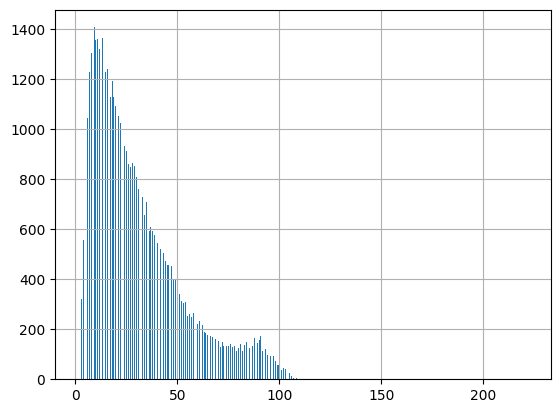

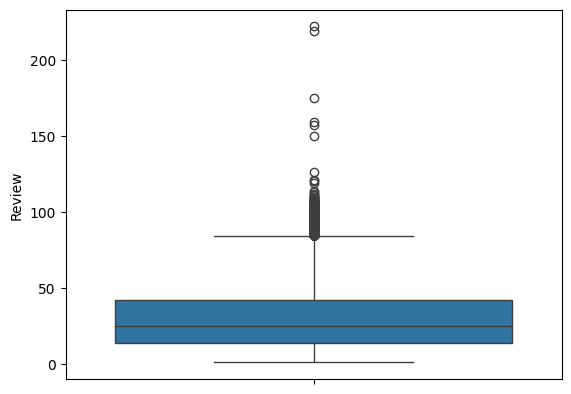

In [13]:
plt.figure()
ser.hist(bins=500)
plt.figure()
sns.boxplot(ser)

In [14]:
train['Review_length'] = train['Review'].apply(lambda x: len(x.split()))
len(train[train['Review_length'] <= 115]) / len(train)

0.9997964666612391

In [15]:
train = train[train['Review_length'] <= 115]
train.drop(columns="Review_length", inplace=True)

<ipython-input-15-25042c93f31f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns="Review_length", inplace=True)


In [16]:
len(train)

49122

- check dataset balancing

In [17]:
train["Rating"].value_counts()

Rating
5    17576
1    14090
4     6263
2     5689
3     5504
Name: count, dtype: int64

<Axes: xlabel='Rating', ylabel='count'>

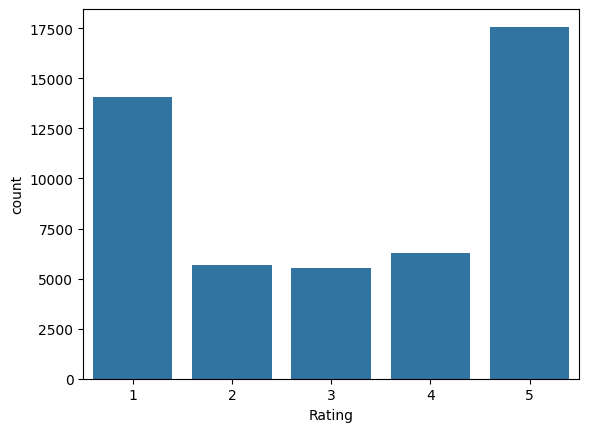

In [18]:
sns.barplot(data=train["Rating"].value_counts())

- Cleaning and Preprocessing are:
    - 1
    - 2
    - 3
    - ... etc.

In [19]:
! pip install contractions
! pip install emoji


In [20]:
import nltk
import re
import emoji
import contractions
import string
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords

In [21]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
stops = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Cleaning and Preprocessing

In [121]:
def clean_txt(text):
    text = text.lower()
    text = re.sub('[*?!#@.,]', '', text)
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = emoji.demojize(text)
    text = text.split()
    text = [word for word in text if word not in stops]
    text = [word for word in text if len(word)>=3]
    text = [lemmatizer.lemmatize(word, pos='v') for word in text]
    text = [stemmer.stem(word) for word in text]
    return ' '.join(text)

In [23]:
for i in range(10) :
    text = train['Review'].iloc[i]
    print(text)

    clean_text = clean_txt(text)
    print(clean_text)
    print("_" * 120)

Making it different from other's is Podcast.... Love the app
make differ other' podcast love app
________________________________________________________________________________________________________________________
Great app! A loads if music and fun! Thank you!
great app load music fun thank
________________________________________________________________________________________________________________________
Best music app so far. I am a premium customer.
best music app far premium custom
________________________________________________________________________________________________________________________
It is so good because any sing you say they have it lyrics abd everything and plus you can hear clewrlt and dowa kot pause or load out of nowhere I love it!!!
good sing say lyric abd everyth plu hear clewrlt dowa kot paus load nowher love
________________________________________________________________________________________________________________________
I love spotify. It 

**You  are doing Great so far!**

### Modelling

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stops = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()
        self.stemmer = PorterStemmer()
        # Add any initialization code here

    def fit(self, X, y=None):
        # Add code for fitting the transformer here
        return self

    def transform(self, X):
        transformed_X = X.copy()
        transformed_X = X.apply(self.clean_txt)
        return transformed_X

    def clean_txt(self,text):
        text = text.lower()
        text = re.sub('[*?!#@.,]', '', text)
        text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
        text = emoji.demojize(text)
        text = text.split()
        text = [word for word in text if word not in stops]
        text = [word for word in text if len(word)>=3]
        text = [lemmatizer.lemmatize(word, pos='v') for word in text]
        text = [stemmer.stem(word) for word in text]
        return ' '.join(text)

    def fit_transform(self, X, y=None):
        # This function combines fit and transform
        self.fit(X, y)
        return self.transform(X)

    def __getstate__(self):
        return {}

    def __setstate__(self, state):
        pass

    def __reduce__(self):
        return (self.__class__, ())

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression


model = LogisticRegression(max_iter=10000)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
count_vectorizer = CountVectorizer(max_features=5000)

In [26]:
pipeline = Pipeline(steps=[
    ('preprocessing', CustomTransformer()),
    ('Vectorizing', count_vectorizer),
    ('model', model),
])

When you run `pipeline.fit(X_train, y_train)`, it will execute the following steps:

1. **Fitting the CustomTransformer**: The `fit()` method of the `CustomTransformer` class will be called. This method initializes the transformer and doesn't perform any specific fitting operation. It simply returns `self`.

2. **Transforming the data**: The `transform()` method of the `CustomTransformer` class will be called. This method cleans the text data in `X_train` by applying various preprocessing steps such as lowercasing, removing punctuation, stopwords, URLs, and emojis, as well as lemmatization and stemming. The cleaned text data will be returned.

3. **Fitting the Logistic Regression model**: The `fit()` method of the Logistic Regression model (which is part of the pipeline) will be called. This method fits the logistic regression model to the cleaned text data (`transformed_X`) and the corresponding labels (`y_train`).

When you run `y_pred = pipeline.predict(X_val)`, it will execute the following steps:

1. **Transforming the validation data**: The `transform()` method of the `CustomTransformer` class will be called again, but this time on `X_val`. This method will clean the text data in `X_val` using the same preprocessing steps applied during training.

2. **Predicting with the Logistic Regression model**: The `predict()` method of the Logistic Regression model (which is part of the pipeline) will be called. This method uses the trained logistic regression model to predict labels for the cleaned text data in `X_val`. The predicted labels (`y_pred`) will be returned.


In [272]:
X_train = train["Review"]
y_train = train["Rating"]

In [28]:
from sklearn.metrics import classification_report
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
y_pred = pipeline.predict(X_val)

#### Evaluation

**Evaluation metric:**
macro f1 score

Macro F1 score is a useful metric in scenarios where you want to evaluate the overall performance of a multi-class classification model, **particularly when the classes are imbalanced**

![Calculation](https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/639c3d934e82c1195cdf3c60_macro-f1.webp)

In [29]:
report = classification_report(y_val, y_pred)

print(report)

              precision    recall  f1-score   support

           1       0.59      0.78      0.67      1765
           2       0.28      0.12      0.16       712
           3       0.29      0.15      0.20       689
           4       0.38      0.24      0.29       784
           5       0.73      0.88      0.80      2209

    accuracy                           0.60      6159
   macro avg       0.45      0.43      0.43      6159
weighted avg       0.54      0.60      0.56      6159



### Enhancement

# `Using Optuna : `

In [30]:
! pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 7.5 MB/s eta 0:00:00


In [122]:
X_train_cleaned = X_train.apply(clean_txt)
X_val_cleaned = X_val.apply(clean_txt)
X_test_cleaned = X_test.apply(clean_txt)


In [ ]:
import optuna
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, make_scorer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def objective(trial):
    vectorizer_type = trial.suggest_categorical('vectorizer', ['count', 'tfidf'])
    max_features = trial.suggest_int('max_features', 1000, 10000)
    C = trial.suggest_loguniform('C', 1, 1000)

    if vectorizer_type == 'count':
        vectorizer = CountVectorizer(max_features=max_features)
    else:
        vectorizer = TfidfVectorizer(max_features=max_features)

    X_train_transformed = vectorizer.fit_transform(X_train_cleaned)

    model = LogisticRegression(max_iter=10000, C=C)

    model.fit(X_train_transformed, y_train)

    X_val_transformed = vectorizer.transform(X_val_cleaned)
    y_pred = model.predict(X_val_transformed)

    f1_macro = f1_score(y_val, y_pred, average='macro')

    return f1_macro

study = optuna.create_study(direction='maximize', study_name='Optimizing_My_Model')
study.optimize(objective, n_trials=20)

best_params = study.best_params
best_C = best_params['C']
best_max_features = best_params['max_features']
best_vectorizer_type = best_params['vectorizer']

if best_vectorizer_type == 'count':
    best_vectorizer = CountVectorizer(max_features=best_max_features)
else:
    best_vectorizer = TfidfVectorizer(max_features=best_max_features)

X_train_transformed = best_vectorizer.fit_transform(X_train_cleaned)

best_model = LogisticRegression(max_iter=10000, C=best_C)
best_model.fit(X_train_transformed, y_train)

X_val_transformed = best_vectorizer.transform(X_val_cleaned)
y_pred = best_model.predict(X_val_transformed)

f1_macro = f1_score(y_val, y_pred, average='macro')
print("Best F1 macro on validation set:", f1_macro)


[I 2024-05-13 15:15:27,200] A new study created in memory with name: Optimizing_My_Model
<ipython-input-40-4005e1b20467>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1, 1000)
[I 2024-05-13 15:17:44,247] Trial 0 finished with value: 0.429126050770331 and parameters: {'vectorizer': 'tfidf', 'max_features': 5789, 'C': 227.95981454316436}. Best is trial 0 with value: 0.429126050770331.
<ipython-input-40-4005e1b20467>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1, 1000)
[I 2024-05-13 15:18:05,813] Trial 1 finished with value: 0.4312696743613598 and parameters: {'vectorizer': 'tfidf', 'max_features':

Best F1 macro on validation set: 0.4422273268633356


In [ ]:
print(f"The best trial is : \n{study.best_trial}")
print()
print(f"The best value is : \n{study.best_value}")
print()
print(f"The best parameters are : \n{study.best_params}")


The best trial is : 
FrozenTrial(number=11, state=TrialState.COMPLETE, values=[0.4422273268633356], datetime_start=datetime.datetime(2024, 5, 13, 15, 32, 59, 120442), datetime_complete=datetime.datetime(2024, 5, 13, 15, 33, 31, 931830), params={'vectorizer': 'tfidf', 'max_features': 3206, 'C': 8.26944275619805}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'vectorizer': CategoricalDistribution(choices=('count', 'tfidf')), 'max_features': IntDistribution(high=10000, log=False, low=1000, step=1), 'C': FloatDistribution(high=1000.0, log=True, low=1.0, step=None)}, trial_id=11, value=None)

The best value is : 
0.4422273268633356

The best parameters are : 
{'vectorizer': 'tfidf', 'max_features': 3206, 'C': 8.26944275619805}


In [ ]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [ ]:
optuna.visualization.plot_parallel_coordinate(study, params=['vectorizer', 'max_features', "C"])

In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
history_csv = study.trials_dataframe()
history_csv.to_csv("hist.csv")
history_csv

,number,value,datetime_start,datetime_complete,duration,params_C,params_max_features,params_vectorizer,state
0,0,0.429126,2024-05-13 15:15:27.212599,2024-05-13 15:17:44.246933,0 days 00:02:17.034334,227.959815,5789,tfidf,COMPLETE
1,1,0.431270,2024-05-13 15:17:44.250367,2024-05-13 15:18:05.812934,0 days 00:00:21.562567,1.431615,5386,tfidf,COMPLETE
2,2,0.426016,2024-05-13 15:18:05.815522,2024-05-13 15:21:48.040164,0 days 00:03:42.224642,679.350341,4998,tfidf,COMPLETE
3,3,0.436932,2024-05-13 15:21:48.042124,2024-05-13 15:22:15.961060,0 days 00:00:27.918936,4.169888,4269,tfidf,COMPLETE
4,4,0.436414,2024-05-13 15:22:15.962872,2024-05-13 15:22:38.791595,0 days 00:00:22.828723,2.141690,5149,tfidf,COMPLETE
5,5,0.435911,2024-05-13 15:22:38.793476,2024-05-13 15:23:35.440083,0 days 00:00:56.646607,13.382475,6706,tfidf,COMPLETE
6,6,0.436701,2024-05-13 15:23:35.442288,2024-05-13 15:24:26.538185,0 days 00:00:51.095897,9.694572,8834,tfidf,COMPLETE
7,7,0.426839,2024-05-13 15:24:26.540458,2024-05-13 15:26:43.094898,0 days 00:02:16.554440,266.443441,5201,tfidf,COMPLETE
8,8,0.410880,2024-05-13 15:26:43.097284,2024-05-13 15:31:57.203758,0 days 00:05:14.106474,413.964642,9067,count,COMPLETE
9,9,0.424432,2024-05-13 15:31:57.207266,2024-05-13 15:32:33.431625,0 days 00:00:36.224359,1.023220,8681,count,COMPLETE


# **`Using Word embedding : `**

In [35]:
!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_md-3.5.0/en_core_web_md-3.5.0.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 919.6/919.6 kB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.5 MB/s eta 0:00:00
  Created wheel for en-core-web-md: filename=en_core_web_md-3.5.0-py3-none-any.whl size=42778836 sha256=6200e307f9960a055ce02d6278bcab54d2f63cae8fbd0af3360b002ee44acced
  Stored in directory: /root/.cache/pip/wheels/ea/66/ff/bfd7e81a1a2fb45e28ac35acab8437feebd1fc693ecbab10aa
Successfully built en-core-web-md
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.7.1
    Uninstalling pydantic-2.7.1:
      Successfully uninstalled pydantic-2.7.1
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.3
    Uninstall

# 1- Using Spacy:

## `Ecode (Embed) whole document`

In [29]:
import spacy
nlp = spacy.load('en_core_web_md')  # Load the medium English model with word vectors


In [63]:
import numpy as np
from tqdm.auto import tqdm
from sklearn.svm import LinearSVC

x_train_v = np.zeros((len(X_train_cleaned), 300))
x_val_v = np.zeros((len(X_val_cleaned), 300))
x_test_v = np.zeros((len(X_test_cleaned), 300))



In [64]:
for i, doc in tqdm(enumerate(nlp.pipe(X_train_cleaned)), total=len(X_train_cleaned)):
    x_train_v[i, :] = doc.vector

for i, doc in tqdm(enumerate(nlp.pipe(X_val_cleaned)), total=len(X_val_cleaned)):
    x_val_v[i, :] = doc.vector

for i, doc in tqdm(enumerate(nlp.pipe(X_test_cleaned)), total=len(X_test_cleaned)):
    x_test_v[i, :] = doc.vector

  0%|          | 0/49122 [00:00<?, ?it/s]

  0%|          | 0/6159 [00:00<?, ?it/s]

  0%|          | 0/6160 [00:00<?, ?it/s]

In [146]:
clf = LinearSVC()
clf.fit(x_train_v, y_train)

In [85]:
target_names = list(df["Rating"].unique().astype(str))
print(classification_report(list(y_val.to_numpy()), list(clf.predict(x_val_v)), target_names=target_names))


              precision    recall  f1-score   support

           5       0.61      0.23      0.34      1765
           4       0.19      0.11      0.14       712
           1       0.14      0.02      0.04       689
           3       0.19      0.04      0.07       784
           2       0.45      0.96      0.61      2209

    accuracy                           0.43      6159
   macro avg       0.31      0.27      0.24      6159
weighted avg       0.40      0.43      0.34      6159



In [88]:
x_train_v.shape

(49122, 300)

# 2- Using gensim:
## `Ecode (Embed) whole document`

In [96]:
! pip install kaggle

In [97]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 66 bytes


In [104]:
! kaggle datasets download -d "leadbest/googlenewsvectorsnegative300"
! unzip googlenewsvectorsnegative300.zip


Dataset URL: https://www.kaggle.com/datasets/leadbest/googlenewsvectorsnegative300
License(s): other
googlenewsvectorsnegative300.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  googlenewsvectorsnegative300.zip
  inflating: GoogleNews-vectors-negative300.bin  
  inflating: GoogleNews-vectors-negative300.bin.gz  


In [116]:
import gensim
from gensim.models import word2vec
from gensim.models import KeyedVectors
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [105]:
EMBEDDING_FILE = 'GoogleNews-vectors-negative300.bin.gz'
word_vectors   = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

In [142]:
def tokenize_and_tag_documents(series, vector_size=100):
  embedded_df = np.zeros((len(series), vector_size))
  tagged_documents = [TaggedDocument(doc.split(), [i]) for i, doc in enumerate(series)]
  model = Doc2Vec(tagged_documents, vector_size=100, window=3, min_count=1, workers=4)
  for i in tqdm(range(len(series))):
    embedded_df[i, :] = model.infer_vector(series.iloc[i].split())
  return embedded_df

In [144]:
train_v = tokenize_and_tag_documents(X_train_cleaned)
val_v = tokenize_and_tag_documents(X_val_cleaned)
test_v = tokenize_and_tag_documents(X_test_cleaned)

  0%|          | 0/49122 [00:00<?, ?it/s]

  0%|          | 0/6159 [00:00<?, ?it/s]

  0%|          | 0/6160 [00:00<?, ?it/s]

In [160]:
lr = LogisticRegression(max_iter=100000, C=250)
lr.fit(train_v, y_train)

LogisticRegression(C=250, max_iter=100000)

In [161]:
target_names = list(df["Rating"].unique().astype(str))
print(classification_report(list(y_val.to_numpy()), list(lr.predict(val_v)), target_names=target_names))

              precision    recall  f1-score   support

           5       0.50      0.56      0.53      1765
           4       0.00      0.00      0.00       712
           1       0.16      0.01      0.01       689
           3       0.00      0.00      0.00       784
           2       0.50      0.95      0.66      2209

    accuracy                           0.50      6159
   macro avg       0.23      0.30      0.24      6159
weighted avg       0.34      0.50      0.39      6159



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 3- RNN:

In [197]:
def get_longest_text(texts):
    longest_input = 0
    for text in texts:
        text_len= len(text.split())
        longest_input = max(longest_input, text_len)
    return longest_input

print(get_longest_text(X_train_cleaned))
print(get_longest_text(X_val_cleaned))
print(get_longest_text(X_test_cleaned))


62
65
339


In [221]:
import tensorflow as tf
word2idx = tf.keras.datasets.imdb.get_word_index()

In [237]:
max_seq_len = 50
x_train_padded = np.empty((len(X_train_cleaned), max_seq_len), dtype=object)

for i, sent in enumerate(X_train_cleaned):
    tokens = sent.split()
    padded_sent = tokens[:max_seq_len] + ['\0'] * (max_seq_len - len(tokens[:max_seq_len]))
    x_train_padded[i, :] = padded_sent


In [238]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=max_seq_len)
tokenizer.fit_on_texts(X_train_cleaned)
word_to_idx = tokenizer.word_index

In [246]:
x_train_padded = np.empty((len(X_train_cleaned), max_seq_len), dtype=int)

for i, sent in enumerate(X_train_cleaned):
    tokens = sent.split()
    padded_sent = tokens[:max_seq_len] + [0] * (max_seq_len - len(tokens[:max_seq_len]))
    padded_sent_ids = [word_to_idx[token] if token in word_to_idx else 0 for token in padded_sent]
    x_train_padded[i, :] = padded_sent_ids


In [247]:
x_val_padded = np.empty((len(X_val_cleaned), max_seq_len), dtype=int)

for i, sent in enumerate(X_val_cleaned):
    tokens = sent.split()
    padded_sent = tokens[:max_seq_len] + [0] * (max_seq_len - len(tokens[:max_seq_len]))
    padded_sent_ids = [word_to_idx[token] if token in word_to_idx else 0 for token in padded_sent]
    x_val_padded[i, :] = padded_sent_ids

In [286]:
x_test_padded = np.empty((len(X_test_cleaned), max_seq_len), dtype=int)

for i, sent in enumerate(X_test_cleaned):
    tokens = sent.split()
    padded_sent = tokens[:max_seq_len] + [0] * (max_seq_len - len(tokens[:max_seq_len]))
    padded_sent_ids = [word_to_idx[token] if token in word_to_idx else 0 for token in padded_sent]
    x_test_padded[i, :] = padded_sent_ids

In [240]:
x_train_padded[:5]

array([[  28,  123, 2997,   27,   11,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [  16,    1,  153,    3,  514,   93,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [  34,    3,    1,  206,   12,  224,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,   

In [287]:
VOCAB_SIZE = len(word_to_idx)
x_train_padded = np.clip(x_train_padded, 0, VOCAB_SIZE - 1)
x_val_padded = np.clip(x_val_padded, 0, VOCAB_SIZE - 1)
x_test_padded = np.clip(x_test_padded, 0, VOCAB_SIZE - 1)

In [274]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [276]:
print(y_val.shape)
print(y_train.shape)


(6159, 6)
(49122, 6)


In [306]:
VOCAB_SIZE = len(word_to_idx) + 1
num_classes=y_train.shape[1]

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(VOCAB_SIZE, 64),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.metrics.F1Score(average='macro')])

In [310]:
history = model.fit(x_train_padded, y_train, epochs=10, batch_size=128,
                    validation_data=(x_val_padded, y_val),
                    validation_steps=30)

Epoch 1/10
384/384 [==============================] - 19s 50ms/step - loss: 0.9988 - categorical_accuracy: 0.6115 - f1_score: 0.3230
Epoch 2/10
384/384 [==============================] - 16s 41ms/step - loss: 0.9763 - categorical_accuracy: 0.6201 - f1_score: 0.3427
Epoch 3/10
384/384 [==============================] - 18s 46ms/step - loss: 0.9615 - categorical_accuracy: 0.6245 - f1_score: 0.3539
Epoch 4/10
384/384 [==============================] - 16s 42ms/step - loss: 0.9450 - categorical_accuracy: 0.6334 - f1_score: 0.3715
Epoch 5/10
384/384 [==============================] - 16s 40ms/step - loss: 0.9322 - categorical_accuracy: 0.6369 - f1_score: 0.3764
Epoch 6/10
384/384 [==============================] - 16s 41ms/step - loss: 0.9241 - categorical_accuracy: 0.6411 - f1_score: 0.3899
Epoch 7/10
384/384 [==============================] - 16s 41ms/step - loss: 0.9003 - categorical_accuracy: 0.6498 - f1_score: 0.4058
Epoch 8/10
384/384 [==============================] - 16s 41ms/step -

In [311]:
pred = model.predict(x_test_padded)
final_pred = [np.argmax(p) for p in pred]

193/193 [==============================] - 1s 5ms/step


In [314]:
print(list(y_test.values[:30]))
print(final_pred[:30])
print(classification_report(list(y_test.to_numpy()), list(final_pred), target_names=target_names))

[5, 5, 5, 5, 5, 1, 5, 1, 5, 1, 2, 2, 5, 1, 4, 1, 5, 5, 5, 3, 5, 4, 5, 5, 1, 3, 1, 1, 5, 5]
[5, 5, 5, 3, 5, 1, 5, 2, 4, 2, 3, 2, 5, 1, 1, 1, 5, 5, 5, 1, 5, 1, 5, 5, 3, 1, 1, 3, 5, 5]
              precision    recall  f1-score   support

           5       0.57      0.72      0.64      1766
           4       0.25      0.18      0.21       712
           1       0.20      0.21      0.21       688
           3       0.29      0.26      0.27       784
           2       0.82      0.75      0.78      2210

    accuracy                           0.55      6160
   macro avg       0.43      0.42      0.42      6160
weighted avg       0.55      0.55      0.55      6160



### Conclusion and final results


#### Done!